### MPI Scalability strong

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data
df_1 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_ord_3_10000.csv', sep=';')
df_2 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_10000.csv', sep=';')
df_3 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_1_20000.csv', sep=';')
df_4 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_2_20000.csv', sep=';')
df_5 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_1_30000.csv', sep=';')
df_6 = pd.read_csv('exercise1/mpi_scalability_strong/log_ms_static_30_2_30000.csv', sep=';')

def extract_info(df):
    # Extract nproc
    df['nproc'] = df['info'].str.extract(r'-n(\d*)')
    df['nproc'] = df['nproc'].replace('', '0')  # replace empty strings with '0'
    df['nproc'] = df['nproc'].fillna('0')  # fill NaN values with '0'
    # Extract nnodes
    df['nnodes'] = df['info'].str.extract(r'-N(\d*)')
    df['nnodes'] = df['nnodes'].replace('', '0')  # replace empty strings with '0'
    df['nnodes'] = df['nnodes'].fillna('0')  # fill NaN values with '0'
    # Extract ssize
    df['ssize'] = df['info'].str.extract(r'-k(\d*)')
    df['ssize'] = df['ssize'].replace('', '0')  # replace empty strings with '0'
    df['ssize'] = df['ssize'].fillna('0')  # fill NaN values with '0'
    # Extract nthreads
    df['nthreads'] = df['info'].str.extract(r'-numthreads:(\w+)')
    df['nthreads'] = df['nthreads'].replace('', '0')  # replace empty strings with '0'
    df['nthreads'] = df['nthreads'].fillna('0')  # fill NaN values with '0'
    # Extract map
    df['map'] = df['info'].str.extract(r'-m:(\w+)')
    # Remove the info column
    df = df.drop(columns=['info'])
    # Convert extracted columns to appropriate data types
    df = df.astype({'nproc': 'int32', 'nnodes': 'int32', 'ssize': 'int32', 'nthreads': 'int32'})
    return df

# Apply the function to all dataframes
df_1 = extract_info(df_1)
df_2 = extract_info(df_2)
df_3 = extract_info(df_3)
df_4 = extract_info(df_4)
df_5 = extract_info(df_5)
df_6 = extract_info(df_6)

# Make an union of all dataframes
#df = pd.concat([df_1, df_2, df_3, df_4, df_5])
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])
display(df)

,file,program,mode,size,step,time_taken,nproc,nnodes,ssize,nthreads,map
0,miofile_10000,mpi_openmp,0,10000,3,23.924110,1,2,10000,0,core
1,miofile_10000,mpi_openmp,0,10000,3,12.905243,2,2,10000,0,core
2,miofile_10000,mpi_openmp,0,10000,3,7.681512,4,2,10000,0,core
3,miofile_10000,mpi_openmp,0,10000,3,5.508912,6,2,10000,0,core
4,miofile_10000,mpi_openmp,0,10000,3,4.583370,8,2,10000,0,core
...,...,...,...,...,...,...,...,...,...,...,...
8,miofile_30000,mpi_openmp,1,30000,30,63.000000,40,2,30000,0,core
9,miofile_30000,mpi_openmp,1,30000,30,60.500000,42,2,30000,0,core
10,miofile_30000,mpi_openmp,1,30000,30,58.500000,44,2,30000,0,core
11,miofile_30000,mpi_openmp,1,30000,30,56.500000,46,2,30000,0,core


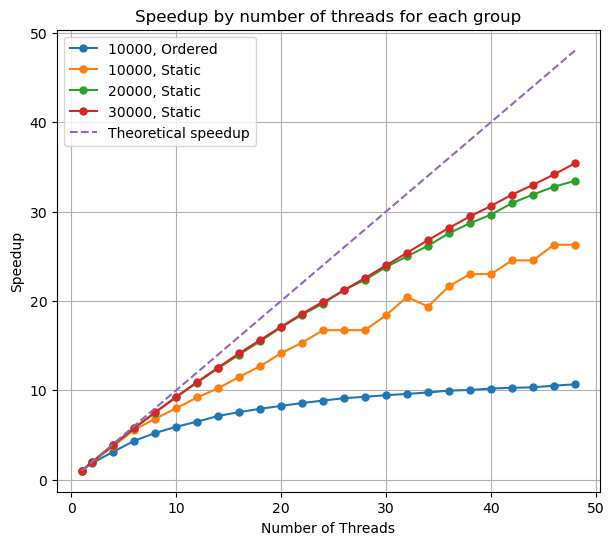

In [2]:
# Group by 'ssize' and 'mode'
grouped = df.groupby(['ssize', 'mode'])

# Create a wider figure
fig, ax = plt.subplots(figsize=(7,6))  # Adjust the width as needed

# Plot speedup for each group
for name, group in grouped:
    # Calculate Tserial (time taken when number of tasks is 1) for each group
    Tserial = group[group['nproc'] == 1]['time_taken'].values[0]
    
    # Calculate speedup
    group['speedup'] = Tserial / group['time_taken']
    
    # Determine mode name
    mode_name = 'Ordered' if name[1] == 0 else 'Static'
    
    ax.plot(group.nproc, group.speedup, marker='o', linestyle='-', ms=5, label=f'{name[0]}, {mode_name}')

# Plot theoretical speedup
nprocs = np.arange(1, df['nproc'].max() + 1)
ax.plot(nprocs, nprocs, linestyle='--', label='Theoretical speedup')

ax.legend()
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup by number of threads for each group')
plt.grid(True)
plt.show()

### MPI Scalability Weak

In [3]:
df = pd.read_csv('exercise1/mpi_scalability_weak/mpi_sw.csv', sep=';')

df = extract_info(df)
df.head(100)

,file,program,mode,size,step,time_taken,nproc,nnodes,ssize,nthreads,map
0,playground_10000,mpi_openmp,0,10000,5,39.867451,1,3,10000,0,socket
1,playground_10000,mpi_openmp,1,10000,5,35.447320,1,3,10000,0,socket
2,playground_14143,mpi_openmp,0,14143,5,42.606072,2,3,10000,0,socket
3,playground_14143,mpi_openmp,1,14143,5,37.685482,2,3,10000,0,socket
4,playground_17321,mpi_openmp,0,17321,5,45.547842,3,3,10000,0,socket
5,playground_17321,mpi_openmp,1,17321,5,39.535082,3,3,10000,0,socket
6,playground_20000,mpi_openmp,0,20000,5,47.303834,4,3,10000,0,socket
7,playground_20000,mpi_openmp,1,20000,5,40.686788,4,3,10000,0,socket
8,playground_22361,mpi_openmp,0,22361,5,49.830179,5,3,10000,0,socket
9,playground_22361,mpi_openmp,1,22361,5,42.502825,5,3,10000,0,socket


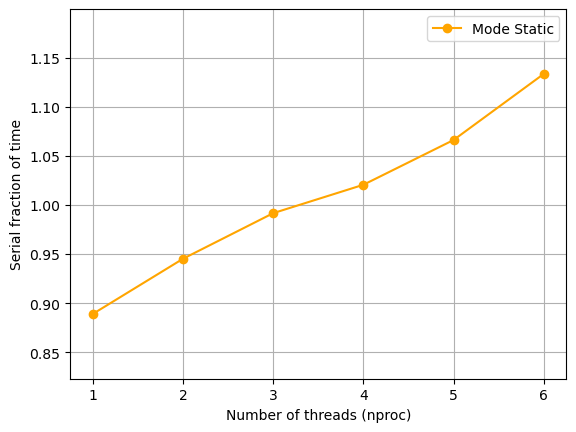

In [4]:
import matplotlib.pyplot as plt

# Group by 'nproc' and 'mode' and calculate mean time taken
grouped = df.groupby(['nproc', 'mode'])['time_taken'].mean().reset_index()

# Calculate the parallel fraction
grouped['parallel_fraction'] = (grouped.loc[grouped['nproc'] == 1, 'time_taken'].values[0] - grouped['time_taken']) / grouped.loc[grouped['nproc'] == 1, 'time_taken'].values[0]

# Calculate the serial fraction
grouped['serial_fraction'] = 1 - grouped['parallel_fraction']

# Plot the data
for mode in grouped['mode'].unique():
    if mode == 0:  # Skip 'Ordered' mode
        continue
    subset = grouped[grouped['mode'] == mode]
    mode_name = 'Static'
    plt.plot(subset['nproc'], subset['serial_fraction'], label=f'Mode {mode_name}', marker='o', linestyle='-', color='orange')

plt.xlabel('Number of threads (nproc)')
plt.ylabel('Serial fraction of time')

# Get current y-axis limits
ymin, ymax = plt.ylim()

# Set new y-axis limits with 10% margin
plt.ylim(ymin - 0.2*(ymax-ymin), ymax + 0.2*(ymax-ymin))

plt.legend()
plt.grid(True)
plt.show()

### OMP Scalability

In [5]:
# Load data

df_1 = pd.read_csv('exercise1/omp_scalability/log_omp_ord_25000.csv', sep=';')
df_2 = pd.read_csv('exercise1/omp_scalability/log_omp_static_25000.csv', sep=';')

# Extract information
df_1 = extract_info(df_1)
df_2 = extract_info(df_2)

# Make an union of all dataframes
df = pd.concat([df_1, df_2])

df


,file,program,mode,size,step,time_taken,nproc,nnodes,ssize,nthreads,map
0,miofile_omp_25000,mpi_openmp,0,25000,5,144.0,2,1,25000,1,socket
1,miofile_omp_25000,mpi_openmp,0,25000,5,144.0,2,1,25000,2,socket
2,miofile_omp_25000,mpi_openmp,0,25000,5,144.0,2,1,25000,3,socket
3,miofile_omp_25000,mpi_openmp,0,25000,5,145.0,2,1,25000,4,socket
4,miofile_omp_25000,mpi_openmp,0,25000,5,144.0,2,1,25000,5,socket
5,miofile_omp_25000,mpi_openmp,0,25000,5,144.0,2,1,25000,6,socket
6,miofile_omp_25000,mpi_openmp,0,25000,5,142.0,2,1,25000,7,socket
7,miofile_omp_25000,mpi_openmp,0,25000,5,144.0,2,1,25000,8,socket
8,miofile_omp_25000,mpi_openmp,0,25000,5,144.0,2,1,25000,9,socket
9,miofile_omp_25000,mpi_openmp,0,25000,5,142.0,2,1,25000,10,socket


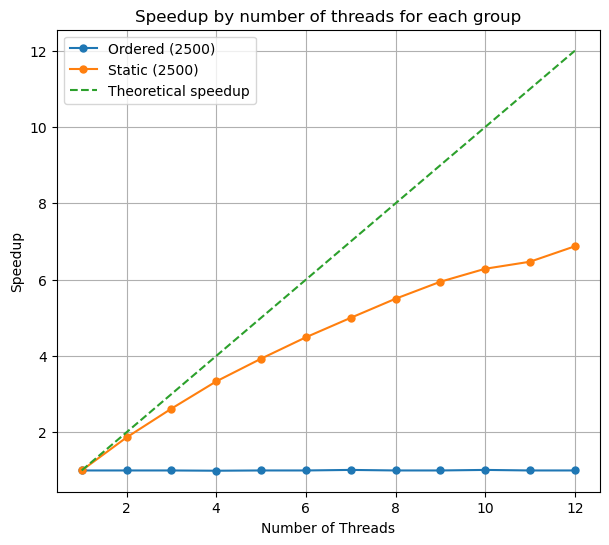

In [6]:
# Group by 'ssize' and 'mode'
grouped = df.groupby('mode')

# Create a wider figure
fig, ax = plt.subplots(figsize=(7,6))  # Adjust the width as needed

# Define a dictionary to map mode values to their names
mode_names = {0: 'Ordered (2500)', 1: 'Static (2500)'}

# Plot speedup for each group
for name, group in grouped:
    # Calculate Tserial (time taken when number of tasks is 1) for each group
    Tserial = group[group['nthreads'] == 1]['time_taken'].values[0]
    
    # Calculate speedup
    group['speedup'] = Tserial / group['time_taken']
    
    # Use the mode_names dictionary to get the name for the mode
    ax.plot(group.nthreads, group.speedup, marker='o', linestyle='-', ms=5, label=mode_names[name])

# Plot theoretical speedup
nthreads = np.arange(1, df['nthreads'].max() + 1)
ax.plot(nthreads, nthreads, linestyle='--', label='Theoretical speedup')

ax.legend()
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup by number of threads for each group')
plt.grid(True)
plt.show()

## Exercise 02

In [7]:
import pandas as pd
import os

root_dirs = ['EPYC', 'THIN']
sub_dirs = ['fixed_cores', 'fixed_size']
sub_sub_dirs = ['close', 'spread']
csv_files = ['d_blis_double.csv', 'd_blis_float.csv', 'd_mkl_double.csv', 'd_mkl_float.csv', 'd_openblas_double.csv', 'd_openblas_float.csv']

dataframes = {}

merged_dataframes = {}

# Iterate over directories and subdirectories
for root_dir in root_dirs:
    for sub_dir in sub_dirs:
        for sub_sub_dir in sub_sub_dirs:
            dfs = []  # list to store DataFrames for each csv_file
            for csv_file in csv_files:
                path = os.path.join(os.getcwd(), "exercise2", root_dir, sub_dir, sub_sub_dir, csv_file)
                if os.path.exists(path):
                    df = pd.read_csv(path, sep=',')
                    library_type, data_type = csv_file.split('_')[1:3]  # extract library type and data type from csv_file name
                    df['library_type'] = library_type
                    df['data_type'] = data_type
                    dfs.append(df)
            if dfs:  # if dfs is not empty
                merged_df = pd.concat(dfs, ignore_index=True)  # concatenate DataFrames along the row axis
                merged_dataframes[os.path.join(root_dir, sub_dir, sub_sub_dir)] = merged_df  # add merged_df to dictionary

# Print all merged dataframes
for path, df in merged_dataframes.items():
    print(path)
    if path == 'EPYC/fixed_cores/close':
        display(df[df['data_type'] == "float.csv"].head(100))

EPYC/fixed_cores/close


,matrix_size,time_mean(s),time_sd,GFLOPS_mean,GFLOPS_sd,library_type,data_type
19,2000,0.007538,0.002795,2287.865078,481.624102,blis,float.csv
20,3000,0.019565,0.003915,2831.075997,360.109054,blis,float.csv
21,4000,0.041445,0.005673,3126.625549,280.063826,blis,float.csv
22,5000,0.085857,0.005205,2921.156366,154.760619,blis,float.csv
23,6000,0.185951,0.013150,2334.703502,163.226663,blis,float.csv
24,7000,0.380767,0.038292,1818.068386,163.619334,blis,float.csv
25,8000,0.547124,0.065935,1893.987542,185.916835,blis,float.csv
26,9000,0.845398,0.055673,1731.390091,102.842511,blis,float.csv
27,10000,1.117365,0.070928,1796.620620,105.737909,blis,float.csv
28,11000,1.340554,0.093920,1994.030886,118.315976,blis,float.csv


EPYC/fixed_cores/spread
EPYC/fixed_size/close
EPYC/fixed_size/spread
THIN/fixed_cores/close
THIN/fixed_cores/spread
THIN/fixed_size/close
THIN/fixed_size/spread


In [8]:
def plot_data_cores(df, path, colors, title_text, theoretical_peak, data_type):
        # Extract the policy from the path
        policy = path.split('/')[-1]

        df_float = df[df['data_type'] == data_type + '.csv']

        # Plot the 'float' data
        for i, library_type in enumerate(df_float['library_type'].unique()):
            df_library = df_float[df_float['library_type'] == library_type]
            plt.plot(df_library['matrix_size'], df_library['GFLOPS_mean'], label='GFLOPS_mean ' + library_type, color=colors[i % len(colors)])  # Use color parameter
            plt.fill_between(df_library['matrix_size'], df_library['GFLOPS_mean'] - df_library['GFLOPS_sd'], df_library['GFLOPS_mean'] + df_library['GFLOPS_sd'], color=colors[i % len(colors)], alpha=0.2)

        plt.axhline(y=theoretical_peak, color='r', linestyle='--', label='Theoretical peak')  # Add a line for the theoretical peak

        plt.title(title_text + ' - ' + data_type + ' - policy=' + policy)
        plt.xlabel('Matrix size')
        plt.ylabel('GFLOPS')
        plt.legend()

        # Show the plot
        plt.tight_layout()
        plt.show()

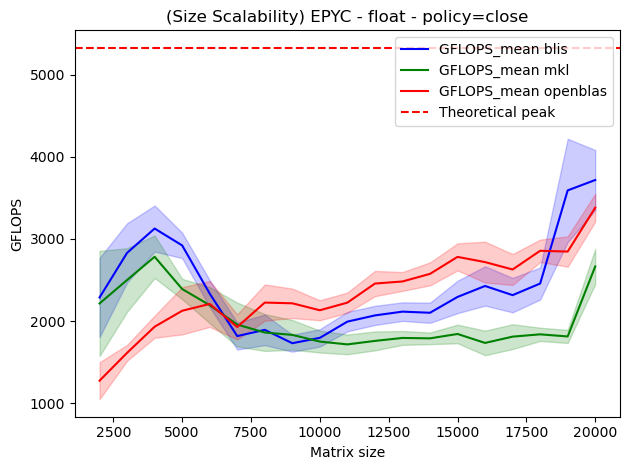

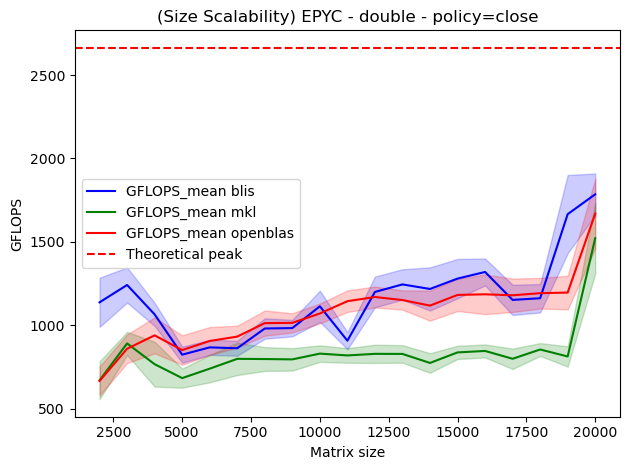

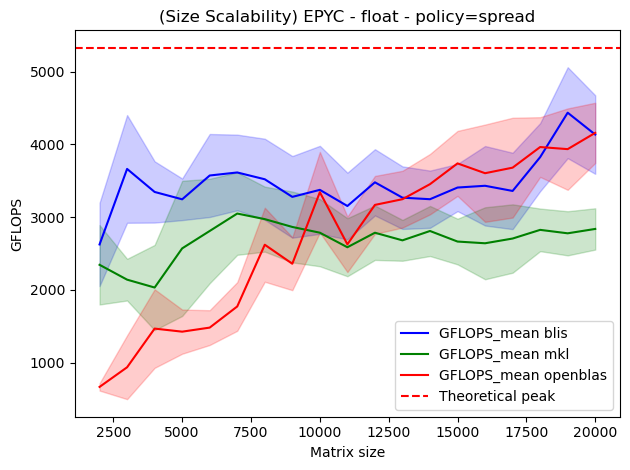

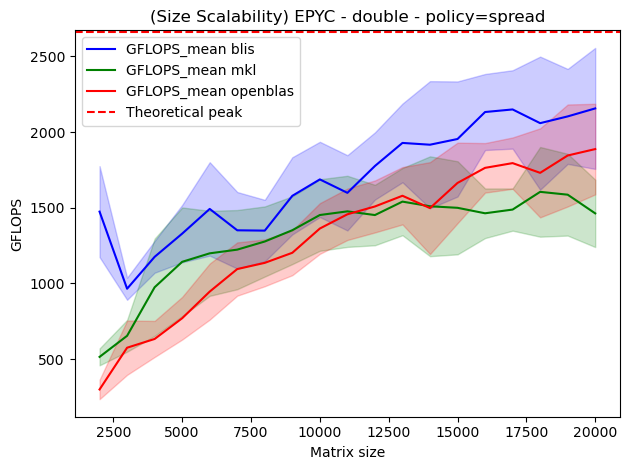

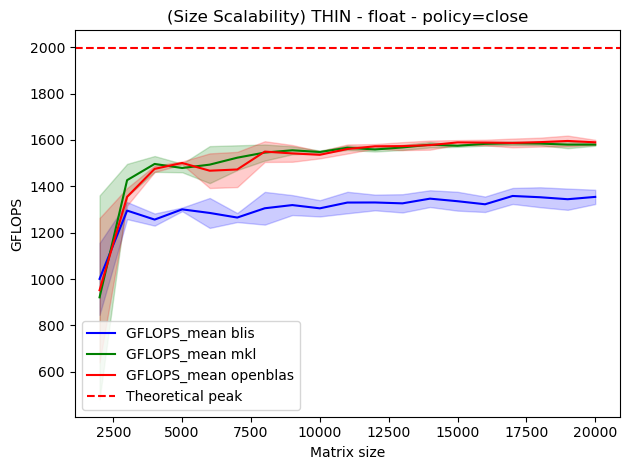

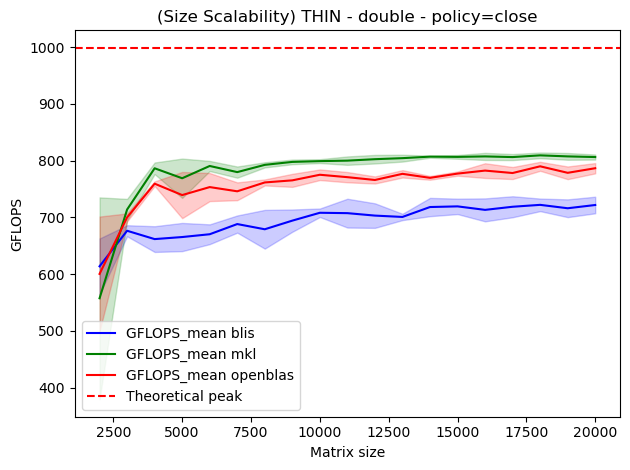

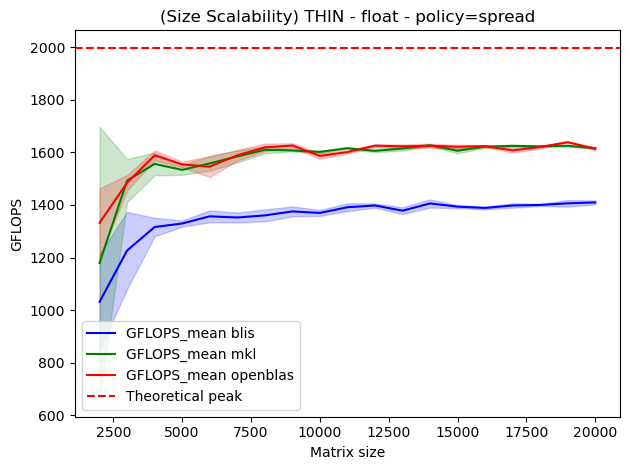

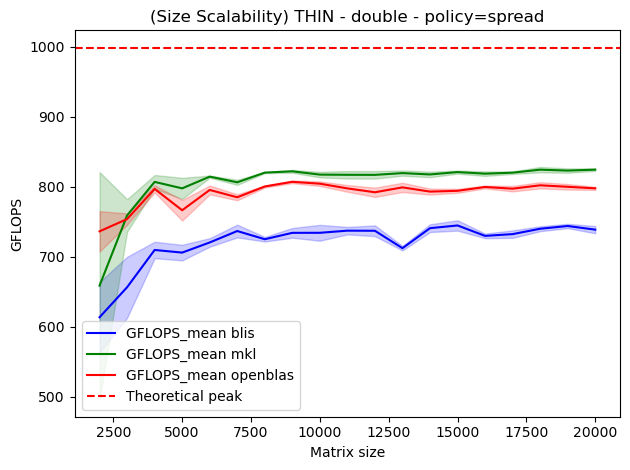

In [9]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']  # Define a list of colors

for path, df in merged_dataframes.items():
    if 'EPYC/fixed_cores' in path:
        plot_data_cores(df, path, colors, '(Size Scalability) EPYC', 5324.8, 'float')
        plot_data_cores(df, path, colors, '(Size Scalability) EPYC', 2662.4, 'double')

for path, df in merged_dataframes.items():
    if 'THIN/fixed_cores' in path:
        plot_data_cores(df, path, colors, '(Size Scalability) THIN', 1997, 'float')
        plot_data_cores(df, path, colors, '(Size Scalability) THIN', 998.5, 'double')

In [10]:
def plot_data_size(df, path, colors, title_text, data_type):
    # Extract the policy from the path
    policy = path.split('/')[-1]

    df_float = df[df['data_type'] == data_type + '.csv']

    for i, library_type in enumerate(df_float['library_type'].unique()):
        df_library = df_float[df_float['library_type'] == library_type]
        # Get the time_mean(s) and time_sd when #cores=1 for the current library_type
        time_mean_at_one_core = df_library[df_library['#cores'] == 1]['time_mean(s)'].values[0]
        time_sd_at_one_core = df_library[df_library['#cores'] == 1]['time_sd'].values[0]  # Assuming you have a 'time_sd' column
        # Calculate the speedup
        speedup = time_mean_at_one_core / df_library['time_mean(s)']
        # Calculate the upper and lower bounds of the speedup based on the standard deviation of the time
        speedup_upper = (time_mean_at_one_core + time_sd_at_one_core) / (df_library['time_mean(s)'] - df_library['time_sd'])
        speedup_lower = (time_mean_at_one_core - time_sd_at_one_core) / (df_library['time_mean(s)'] + df_library['time_sd'])
        plt.plot(df_library['#cores'], speedup, label='Speedup ' + library_type, color=colors[i % len(colors)])  # Use color parameter
        plt.fill_between(df_library['#cores'], speedup_lower, speedup_upper, color=colors[i % len(colors)], alpha=0.2)  # Fill the area between the bounds
        
    # Add a line for the theoretical speedup
    cores = df_float['#cores'].unique()
    plt.plot(cores, cores, color='r', linestyle='--', label='Theoretical speedup')

    plt.title(title_text + ' - ' + data_type + ' - policy=' + policy)
    plt.xlabel('#cores')
    plt.ylabel('Speedup')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

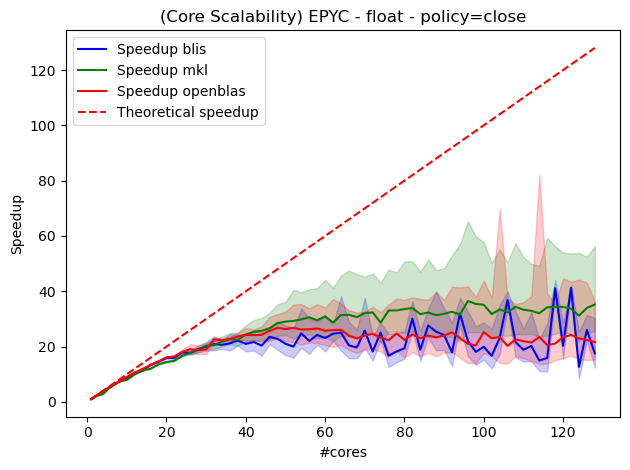

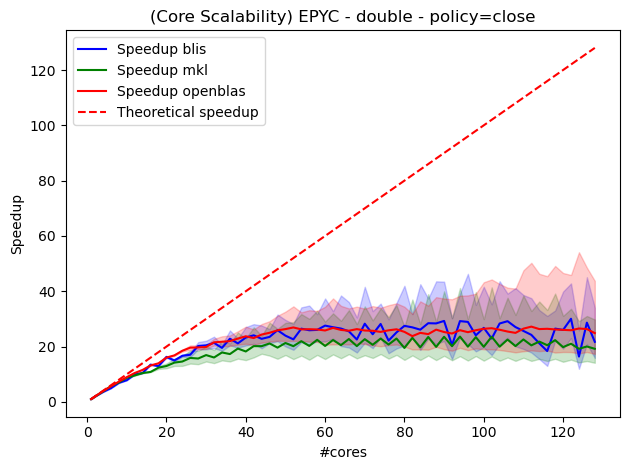

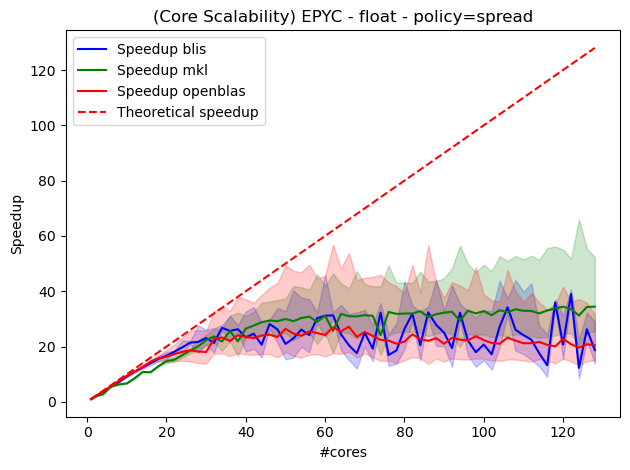

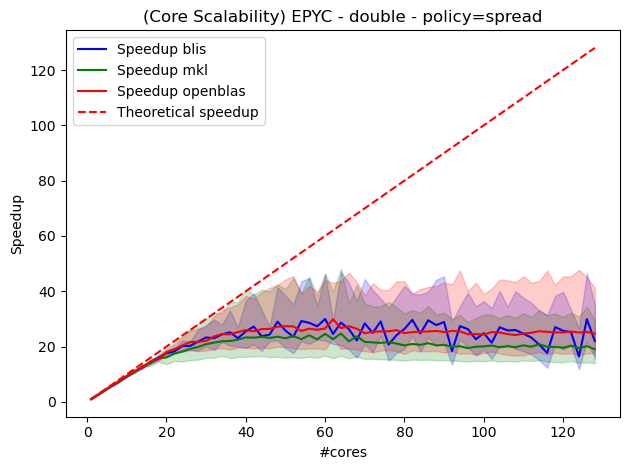

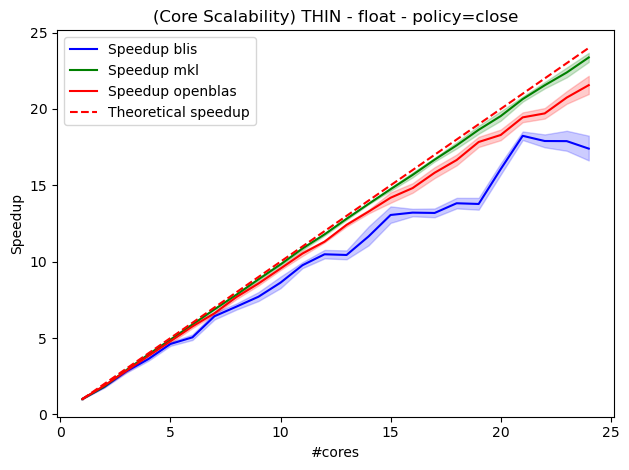

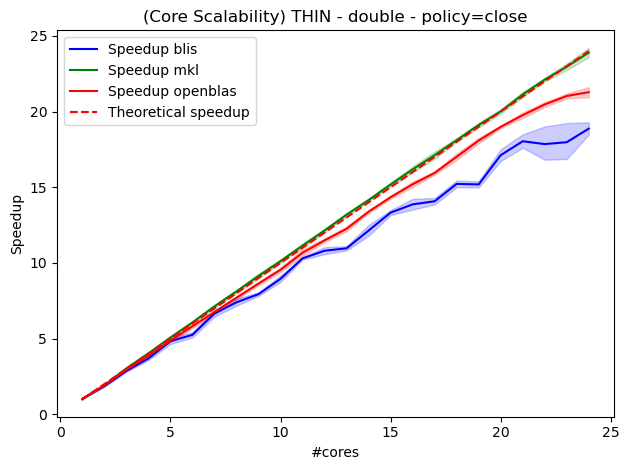

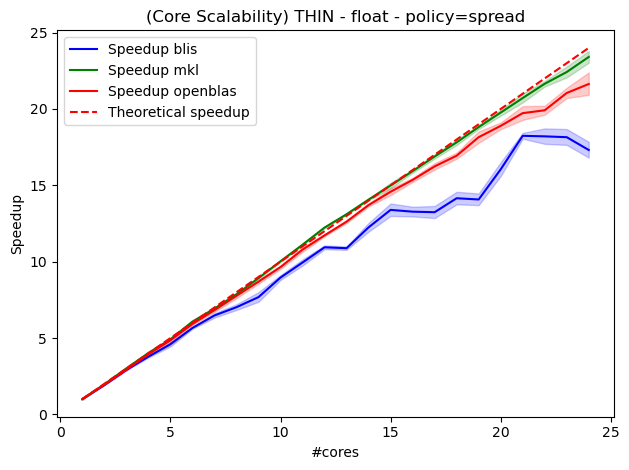

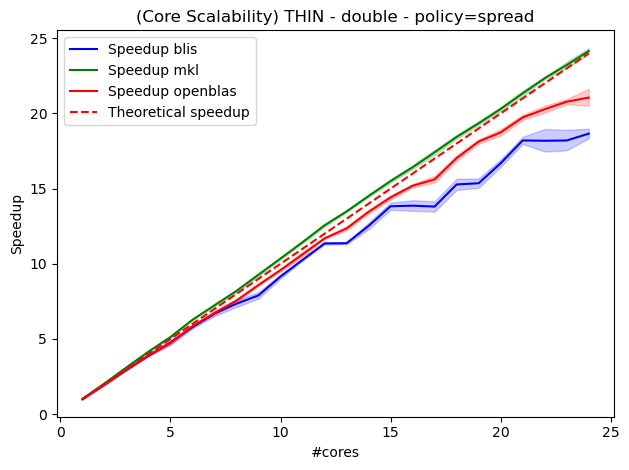

In [11]:
for path, df in merged_dataframes.items():
    if 'EPYC/fixed_size' in path:
        plot_data_size(df, path, colors, '(Core Scalability) EPYC', 'float')
        plot_data_size(df, path, colors, '(Core Scalability) EPYC', 'double')

for path, df in merged_dataframes.items():
    if 'THIN/fixed_size' in path:
        plot_data_size(df, path, colors, '(Core Scalability) THIN', 'float')
        plot_data_size(df, path, colors, '(Core Scalability) THIN', 'double')